In [226]:
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Transformer
import pyproj
import folium
from datetime import datetime
from shapely.geometry import Point,Polygon
from pyproj import Proj, transform

In [227]:
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')

In [228]:
boundary = gp.read_file("C:/Users/guswn/Downloads/xn--_-shp-wu9s511b22i5pu95dr8meqcdzb/dc6d83d7-c84e-48b8-b29e-34ce3b86bfa62020328-1-1osfhvj.te5a.shp",encoding='cp949')

In [229]:
boundary

,FID,OBJECTID,LINK_ID,ST_ND_ID,ED_ND_ID,LENGTH,ST_DIR,ED_DIR,LINK_CATE,ROAD_CATE,LINK_CATE2,ROAD_NO,ONEWAY,LANE,ROAD_NAME,ALTITUDE,TRACK,Shape__Len,geometry
0,1,273,910814,239,75272,42,0,0,1,13,0,None,1,1,None,31,3,0.000465,"LINESTRING (126.90889 37.55825, 126.90843 37.5..."
1,2,276,910837,74711,74706,24,0,0,1,13,0,None,1,1,None,0,3,0.000244,"LINESTRING (127.03617 37.55036, 127.03599 37.5..."
2,3,277,910859,75704,80338,79,0,0,1,13,0,None,1,1,None,0,3,0.000742,"LINESTRING (127.07802 37.56793, 127.07766 37.5..."
3,4,278,912133,80857,80856,91,0,0,1,13,0,None,1,1,None,14,3,0.000824,"LINESTRING (126.89935 37.56350, 126.89941 37.5..."
4,5,280,912135,80859,80860,58,0,0,1,13,0,None,1,1,None,0,1,0.000524,"LINESTRING (126.89978 37.56422, 126.89981 37.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12626,12627,3533,910087,74140,74127,37,0,0,1,13,0,None,1,1,None,30,3,0.000382,"LINESTRING (126.94069 37.53882, 126.94081 37.5..."
12627,12628,3544,910051,73280,73292,34,0,0,1,13,0,None,1,1,None,0,3,0.000374,"LINESTRING (127.08846 37.52748, 127.08877 37.5..."
12628,12629,8363,902538,72301,72291,24,0,0,1,13,0,None,1,1,넚뙆濡,15,5,0.000233,"LINESTRING (127.09816 37.51541, 127.09830 37.5..."
12629,12630,8371,902547,71600,71601,6,0,0,1,13,0,None,1,1,None,14,5,0.000062,"LINESTRING (127.08656 37.50492, 127.08650 37.5..."


In [230]:
seoul=gp.read_file("C:/Users/guswn/Downloads/SIG_202005/SIG.shp",encoding="utf-8")

In [231]:
seoul

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,b'c1beb7ceb1b8',"POLYGON ((956615.453 1953567.199, 956621.579 1..."
1,11140,Jung-gu,b'c1dfb1b8',"POLYGON ((957890.386 1952616.746, 957909.908 1..."
2,11170,Yongsan-gu,b'bfebbbeab1b8',"POLYGON ((953115.761 1950834.084, 953114.206 1..."
3,11200,Seongdong-gu,b'bcbab5bfb1b8',"POLYGON ((959681.109 1952649.605, 959842.412 1..."
4,11215,Gwangjin-gu,b'b1a4c1f8b1b8',"POLYGON ((964825.058 1952633.250, 964875.565 1..."
...,...,...,...,...
245,48870,Hamyang-gun,b'c7d4bee7b1ba',"POLYGON ((1017715.723 1751280.191, 1017761.619..."
246,48880,Geochang-gun,b'b0c5c3a2b1ba',"POLYGON ((1034571.593 1767759.812, 1034559.208..."
247,48890,Hapcheon-gun,b'c7d5c3b5b1ba',"POLYGON ((1054066.576 1759517.415, 1054101.450..."
248,50110,Jeju-si,b'c1a6c1d6bdc3',"MULTIPOLYGON (((874410.953 1480515.382, 874408..."


In [232]:
result = [item for item in seoul["SIG_ENG_NM"] if item[-2:] == 'gu']
str(result)

"['Jongno-gu', 'Jung-gu', 'Yongsan-gu', 'Seongdong-gu', 'Gwangjin-gu', 'Dongdaemun-gu', 'Jungnang-gu', 'Seongbuk-gu', 'Gangbuk-gu', 'Dobong-gu', 'Nowon-gu', 'Eunpyeong-gu', 'Seodaemun-gu', 'Mapo-gu', 'Yangcheon-gu', 'Gangseo-gu', 'Guro-gu', 'Geumcheon-gu', 'Yeongdeungpo-gu', 'Dongjak-gu', 'Gwanak-gu', 'Seocho-gu', 'Gangnam-gu', 'Songpa-gu', 'Gangdong-gu', 'Jung-gu', 'Seo-gu', 'Dong-gu', 'Yeongdo-gu', 'Busanjin-gu', 'Dongnae-gu', 'Nam-gu', 'Buk-gu', 'Haeundae-gu', 'Saha-gu', 'Geumjeong-gu', 'Gangseo-gu', 'Yeonje-gu', 'Suyeong-gu', 'Sasang-gu', 'Jung-gu', 'Dong-gu', 'Seo-gu', 'Nam-gu', 'Buk-gu', 'Suseong-gu', 'Dalseo-gu', 'Jung-gu', 'Dong-gu', 'Michuhol-gu', 'Yeonsu-gu', 'Namdong-gu', 'Bupyeong-gu', 'Gyeyang-gu', 'Seo-gu', 'Dong-gu', 'Seo-gu', 'Nam-gu', 'Buk-gu', 'Gwangsan-gu', 'Dong-gu', 'Jung-gu', 'Seo-gu', 'Yuseong-gu', 'Daedeok-gu', 'Jung-gu', 'Nam-gu', 'Dong-gu', 'Buk-gu']"

In [233]:
seoul=seoul.iloc[:25]

<AxesSubplot:>

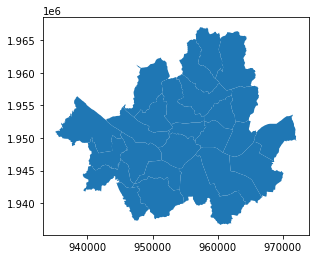

In [234]:
seoul.plot()


In [235]:
seoul = seoul.to_crs(epsg = 4326)

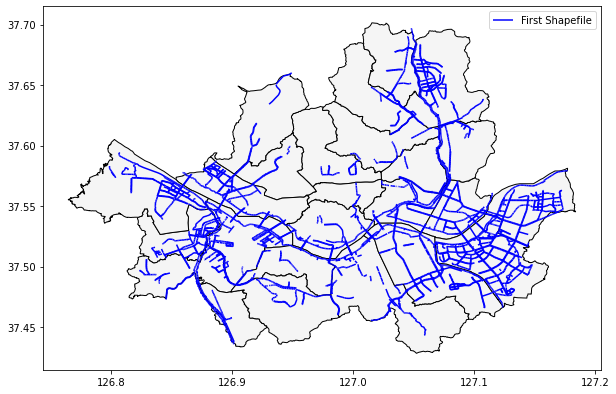

In [236]:
fig, ax = plt.subplots(figsize=(10, 10))

# 첫 번째 데이터를 그립니다.
boundary.plot(ax=ax, color='blue', label='First Shapefile')

# 두 번째 데이터를 그립니다.
seoul.plot(ax=ax, color='whitesmoke',edgecolor='black', linewidth=1, label='Second Shapefile')

# 'aspect' 매개변수를 수정합니다.
ax.set_aspect('equal')

# 범례를 추가합니다.
plt.legend()

# plot을 보여줍니다.
plt.show()

In [237]:
print(boundary.crs)
print(seoul.crs)

EPSG:4326
EPSG:4326


C:\Users\guswn\AppData\Local\Temp\ipykernel_15888\1754402207.py:8: UserWarning: The indices of the two GeoSeries are different.
  link_data_within_region = region_geometry.contains(boundary["geometry"])


TypeError: no numeric data to plot

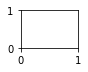

In [238]:
a = [i for i in range(1, 26)]

for i,reg in zip(a,seoul["SIG_ENG_NM"]):  
    ax = plt.subplot(5,5,i)
    region_name = reg  # 혹은 적절한 컬럼명으로 변경하세요.
    count=(seoul["SIG_ENG_NM"]==reg)
    region_geometry = seoul[count]["geometry"]
    link_data_within_region = region_geometry.contains(boundary["geometry"])
    link_data_within_region.plot(ax=ax, label=region_name)
    region_geometry.plot()
    ax.set_title(region_name)
    ax.set_aspect('equal')

# 그래픽 출력
plt.tight_layout()
plt.show()

filtered_coords = [point for point in linestring_coords if polygon.contains(Point(point))]

In [243]:
gulist = seoul['SIG_ENG_NM'].unique()

In [240]:
sum(seoul[seoul["SIG_ENG_NM"]=='Nowon-gu']["geometry"].contains(boundary["geometry"]))

C:\Users\guswn\AppData\Local\Temp\ipykernel_15888\4245913255.py:1: UserWarning: The indices of the two GeoSeries are different.
  sum(seoul[seoul["SIG_ENG_NM"]=='Nowon-gu']["geometry"].contains(boundary["geometry"]))


0

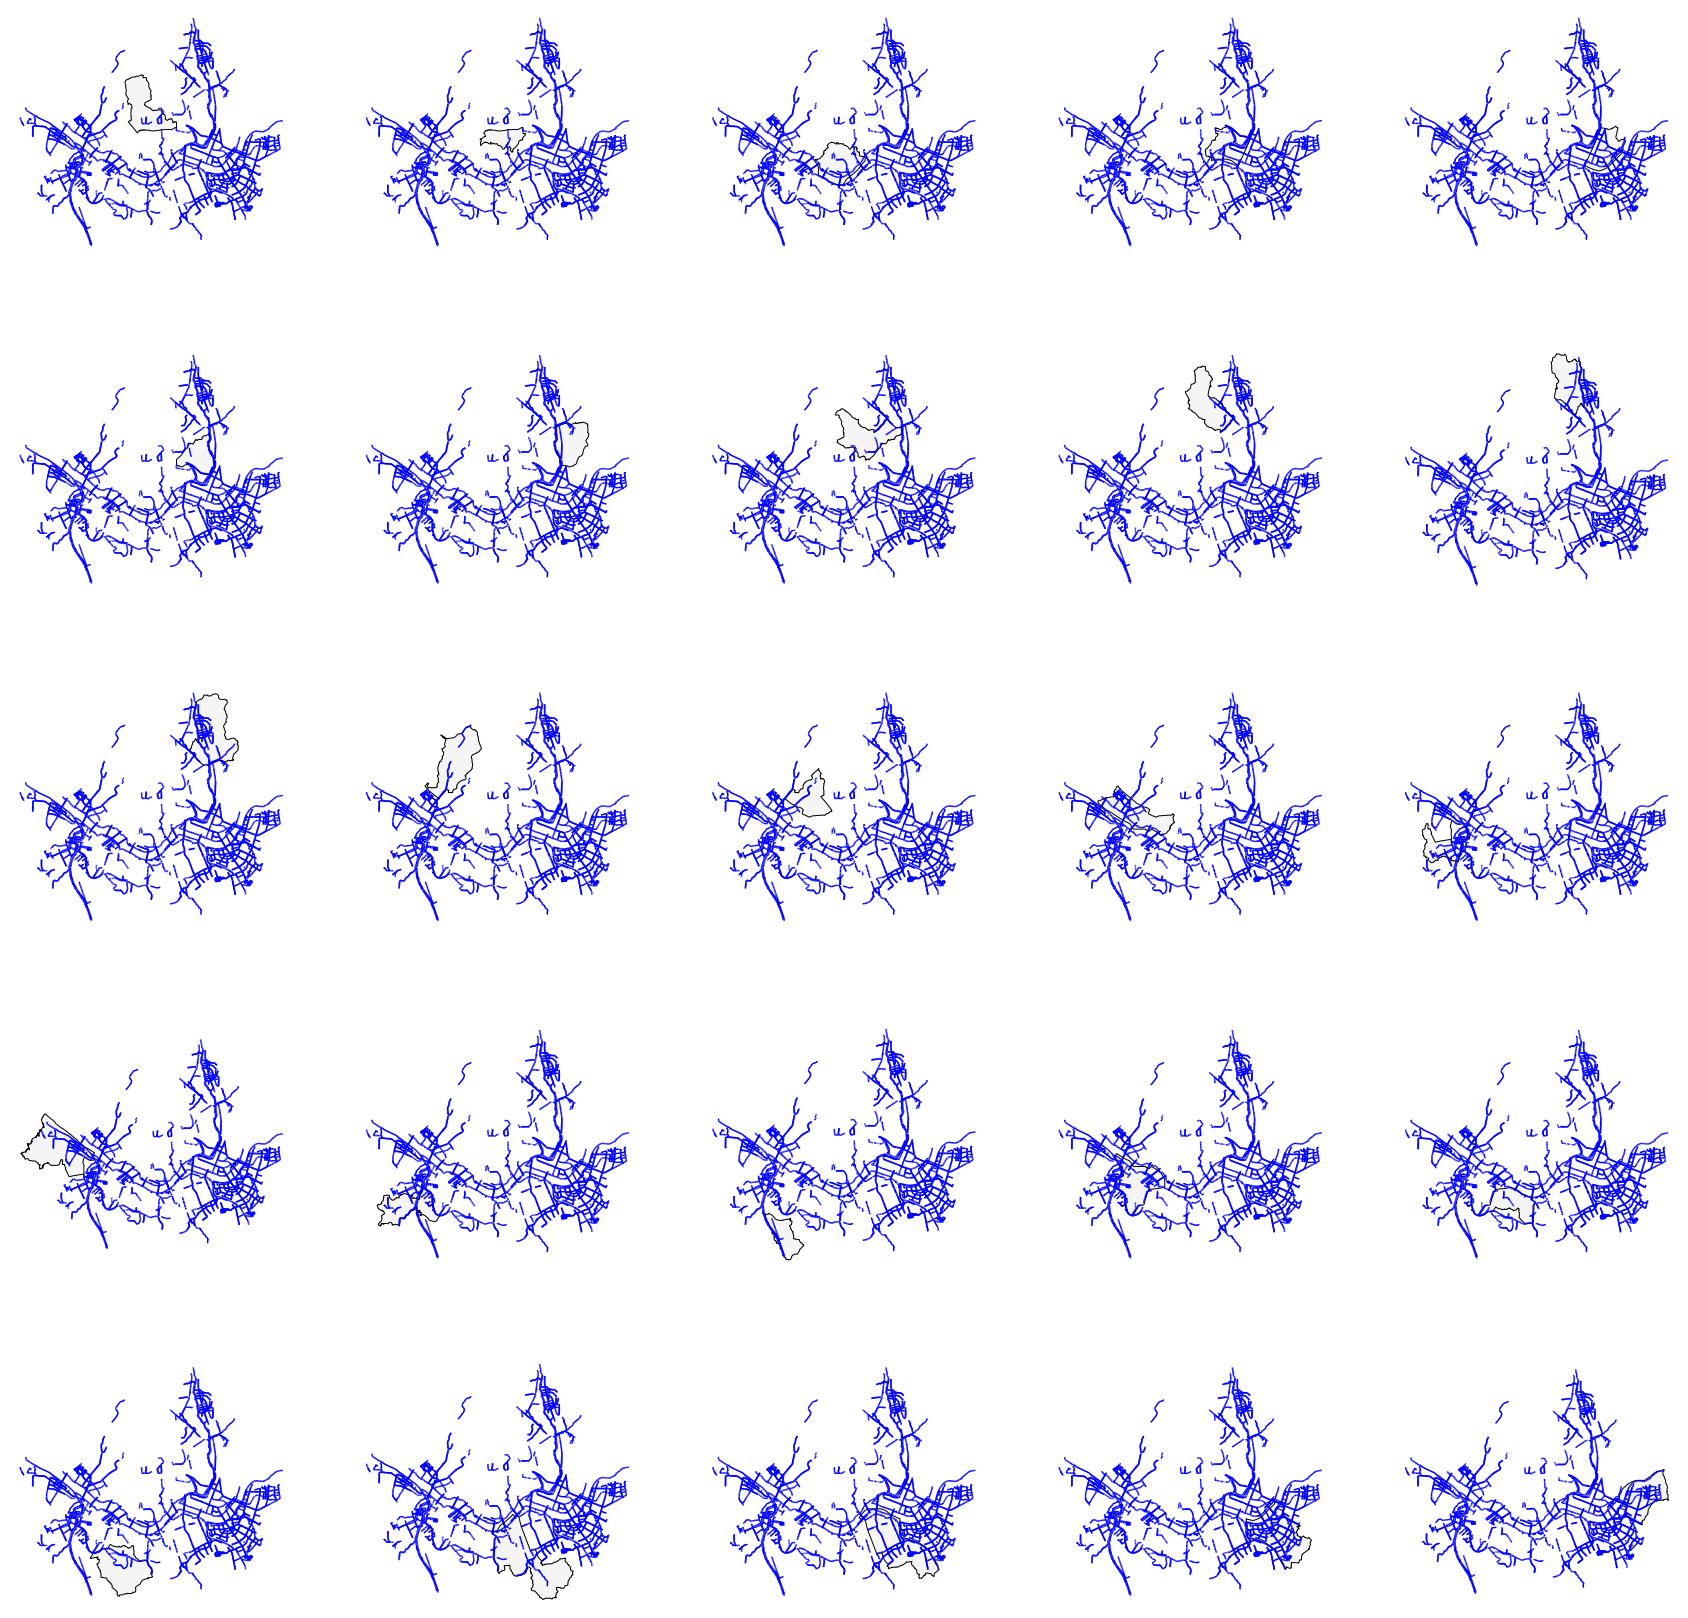

In [245]:
j = 1
plt.figure(figsize = (30,30))
for i in gulist:
    gu_boundary = seoul[seoul['SIG_ENG_NM'] == i]
    ax = plt.subplot(5,5,j)
    gu_boundary.plot(figsize=(5,5), color='whitesmoke', edgecolor='black', linewidth=1,ax = ax)
    boundary.plot(ax=ax, color='blue', label='First Shapefile')
    ax.axis('off')
    j = j+1
plt.show()